# Atelier 5 : Topic Mining


L'objectif de cet atelier est de decouvrire le Topic Mining à travers un dataset de news. Le dataset comprend 18846 posts appartenant à 20 topics differents et qui sont reparties en deux groupes: un dataset d'apprentissage et un dataset de test. 

# 1. Praitraitements / NLP

## 1.1 Recuperration du corpus 

In [ ]:
from sklearn.datasets import fetch_20newsgroups
#fetch return a brunch that is a dictionary-like object, with the following attributes.
data, targets = fetch_20newsgroups(subset='train', return_X_y=True)
print(data[5])


From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [ ]:
print(data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [ ]:
k=set(targets)

In [ ]:
print(len(data))

11314


## 1.2 Cleaning 

Le corpus comporte des posts qui necessitent un cleaning afin de ne garder que les donnees qui vont nous servir dans l'opération du topic mining. 

    *supprimer les emails
    *supprimer les adresses des sites web
    *supprimer les nombres et les caractères spéciaux
    *supprimer les stopwords(on la rporte vers l'etape de vectorisation)
    *supprimer les terms non sigificatifs (non anglais )

In [ ]:
  >>> import nltk
  >>> nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
'''
.           Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	        Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	    Parentheses that indicate the scope of the operators
'''


'''
\number
Correspond au contenu du groupe du même nombre. Les groupes sont numérotés à partir de 1. Par exemple, (.+) \1 correspond à 'the the' ou '55 55', mais pas à 'thethe' (notez l’espace après le groupe). Cette séquence spéciale ne peut être utilisée que pour faire référence aux 99 premiers groupes. Si le premier chiffre de number est 0, ou si number est un nombre octal de 3 chiffres, il ne sera pas interprété comme une référence à un groupe, mais comme le caractère à la valeur octale number. À l’intérieur des '[' et ']' d’une classe de caractères, tous les échappements numériques sont traités comme des caractères.

\A
Correspond uniquement au début d’une chaîne de caractères.

\b
Correspond à la chaîne vide, mais uniquement au début ou à la fin d’un mot. Un mot est défini comme une séquence de « caractères de mots ». Notez que formellement, \b est défini comme la liaison entre \w et \W (et inversement), ou entre \w et le début/fin d’un mot. Cela signifie que r'\bfoo\b' validera 'foo', 'foo.', '(foo)' ou 'bar foo baz' mais pas 'foobar' ou 'foo3'.

Les caractères alphanumériques Unicode sont utilisés par défaut dans les motifs Unicode, mais cela peut être changé en utilisant l’option ASCII. Les délimitations de mots sont déterminées par la locale si l’option LOCALE est utilisée. À l’intérieur d’un intervalle de caractères, \b représente le caractère backspace, par compatibilité avec les chaînes littérales Python.

\B
Correspond à la chaîne vide, mais uniquement quand elle n’est pas au début ou à la fin d’un mot. Cela signifie que r'py\B' valide 'python', 'py3' ou 'py2', mais pas 'py', 'py.' ou 'py!'. \B est simplement l’opposé de \b, donc les caractères de mots dans les motifs Unicode sont les alphanumériques et tirets bas Unicode, bien que cela puisse être changé avec l’option ASCII. Les délimitations de mots sont déterminées par la locale si l’option LOCALE est utilisée.

\d
Pour les motifs Unicode (str) :
Valide n’importe quel chiffre décimal Unicode (soit tout caractère Unicode de catégorie [Nd]). Cela inclue [0-9], mais aussi bien d’autres caractères de chiffres. Si l’option ASCII est utilisée, seuls les caractères de la classe [0-9] correspondront (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [0-9] explicite).

Pour les motifs 8-bit (bytes) :
Valide n’importe quel chiffre décimal ; équivalent à [0-9].

\D
Valide tout caractère qui n’est pas un chiffre décimal. C’est l’opposé de \d. Si l’option ASCII est utilisée, cela devient équivalent à [^0-9] (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser explicitement [^0-9]).

\s
Pour les motifs Unicode (str) :
Valide les caractères d’espacement Unicode (qui incluent [ \t\n\r\f\v] et bien d’autres, comme les espaces insécables requises par les règles typographiques de beaucoup de langues). Si l’option ASCII est utilisée, seuls les caractères de la classe [ \t\n\r\f\v] sont validés (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [ \t\n\r\f\v] explicite).

Pour les motifs 8-bit (bytes) :
Valide les caractères considérés comme des espacements dans la table ASCII ; équivalent à [ \t\n\r\f\v].

\S
Valide tout caractère qui n’est pas un caractère d’espacement. c’est l’opposé de \s. Si l’option ASCII est utilisée, cela devient équivalent à [^ \t\n\r\f\v] (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [^ \t\n\r\f\v] explicite).

\w
Pour les motifs Unicode (str) :
Valide les caractères Unicode de mot ; cela inclut la plupart des caractères qui peuvent être compris dans un mot d’une quelconque langue, aussi bien que les nombres et les tirets bas. Si l’option ASCII est utilisée, seuls les caractères de la classe [a-zA-Z0-9_] sont validés (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [a-zA-Z0-9_] explicite).

Pour les motifs 8-bit (bytes) :
Valide les caractères alphanumériques de la table ASCII ; équivalent à [a-zA-Z0-9_]. Si l’option LOCALE est utilisée, les caractères considérés alphanumériques dans la locale et le tiret bas seront acceptés.

\W
Valide tout caractère qui n’est pas un caractère de mot. C’est l’opposé de \w. Si l’option ASCII est utilisée, cela devient équivalent à [^a-zA-Z0-9_] (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [^a-zA-Z0-9_] explicite). Si l’option LOCALE est utilisée, les caractères considérés alphanumériques dans la locale courrante, et le tiret bas, seront acceptés.

\Z
Correspond uniquement à la fin d’une chaîne de caractères
'''
import re
def cleaninng(doc):
    return re.sub("\S+@\S+|(www\S+)|[0-9]+|[@_!#$%^&*()<>?/\|}{~:]*","", doc)
    

data= [cleaninng(doc) for doc in data]

import nltk

'''Supprimer les terms non anglais'''
words = set(nltk.corpus.words.words())
def English(doc):
    return " ".join(w for w in nltk.wordpunct_tokenize(doc) if w.lower() in words)

data= [English(doc) for doc in data]
print(data[0],targets[0])

From where s my thing Subject WHAT car is this Posting Host Organization University of College Park I was wondering if anyone out there could enlighten me on this car I saw the other day It was a door sports car to be from the late s early s It was a The were really small In addition the front bumper was separate from the rest of the body This is all I know If anyone can a model name engine specs of production where this car is made history or whatever you have on this funky looking car please e mail Thanks brought to you by your neighborhood 7


## 1.2 Lemmatisation

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import words

lemmmatizer=WordNetLemmatizer()
corpus_lemetized=[]
for doc in data: 
    words = word_tokenize(doc)
    words = [lemmmatizer.lemmatize(word.lower()) for word in words if(not word.lower() in set(stopwords.words('english')) and  word.isalpha() and word.lower()!="subject" and word.lower()!="from")]
    doc=" ".join(words)
    corpus_lemetized.append(doc)
print(corpus_lemetized[0])

thing car posting host organization university college park wondering anyone could enlighten car saw day door sport car late early really small addition front bumper separate rest body know anyone model name engine spec production car made history whatever funky looking car please e mail thanks brought neighborhood


In [ ]:
>>> import nltk
>>> nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
>>> import nltk
>>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
 >>> import nltk
>>> nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# 2. Approche Mono-Terme

Récupérer la représentation vectorielle des differents documents avec le TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer(stop_words = 'english')
vect = vectorizer.fit_transform(corpus_lemetized)
pd.DataFrame(vect.toarray(), columns=vectorizer.get_feature_names())

,aa,aal,aba,abacus,abandon,abandoned,abandonment,abate,abatement,abbey,abbot,abbreviation,abdication,abdomen,abdominal,abduct,abduction,abed,aberrant,aberration,abhor,abhorrent,abide,abiding,abigail,ability,abiogenesis,ablaze,able,ably,abnormal,abnormally,aboard,abode,abolish,abolishment,abolition,abolitionist,abominable,abomination,...,yuan,yuca,yuck,yucky,yummy,za,zad,zaman,zany,zax,zeal,zealot,zealous,zebra,zein,zenith,zephyr,zeppelin,zero,zeta,zinc,zing,zip,zipper,zipping,zippy,zirconium,zo,zombie,zonal,zone,zoning,zoo,zooid,zoological,zoology,zoom,zorro,zowie,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Réaliser une fonction de scoring qui permettra de déterminer les mots les plus pertinents pour être des topics.

In [ ]:
scores=[]
tfidf_vect=vect.toarray()
for j in range(len(tfidf_vect[0])):
    s=[tfidf_vect[i][j] for i in range(len(tfidf_vect))]
    scores.append(sum(s)/len(tfidf_vect))

vocab=vectorizer.get_feature_names()
topics=[]
for k in range(20):
    topics.append(vocab[scores.index(max(scores))])
    scores.pop(scores.index(max(scores)))
    vocab.pop(scores.index(max(scores)))
topics


['organization',
 'articulate',
 'university',
 'posting',
 'hostage',
 'likelihood',
 'knowability',
 'people',
 'time',
 'think',
 'newcomer',
 'distributor',
 'goodly',
 'use',
 'thanks',
 'reply',
 'needham',
 'work',
 'goddard',
 'comrade']

In [ ]:
topic=topics[:]

In [ ]:
topic

['organization',
 'articulate',
 'university',
 'posting',
 'hostage',
 'likelihood',
 'knowability',
 'people',
 'time',
 'think',
 'newcomer',
 'distributor',
 'goodly',
 'use',
 'thanks',
 'reply',
 'needham',
 'work',
 'goddard',
 'comrade']

Modifier le code precedent pour identifier les topics similaires (selon un seuil predeterminé) et ne garder que le plus pertinents. chaque terme supprimé doit etre remplacé par le terme suivant dans la liste des scores.
    *Utiliser l'approche semantique lexicale
    *Utiliser l'approche semantiqe statistique: le wordembedding

In [ ]:
topic=topics[:]

In [ ]:
Corp=[a.split(" ") for a in corpus_lemetized]

In [ ]:
from gensim.models import Word2Vec
from gensim.test.utils import datapath
from gensim.models.word2vec import PathLineSentences
model = Word2Vec(sentences=Corp, size=10, window=3, min_count=1, workers=2)


In [ ]:
seuil=0.7
s=0
for i in range(len(topic)):
    for j in range(1,len(topic)):
        if j>=len(topic) or i>=len(topic):
            break
        if model.wv.similarity(topic[i], topic[j])>0.7:
            topic.pop(j)
            s+=1
            j-=1


In [ ]:
s

13

DISTRIBUTION DANS LE CAS DU NON PREETABLIS :

In [ ]:
t=[]
for i in corpus_lemetized:
  s=0
  for j in topic:
      s+=i.count(j)
  t.append(s)

In [ ]:
distribution=[[0]*len(topic) for i in range(len(corpus_lemetized))]
#je vais crééer un tableau qui contient le nbre d'occurence de chaque topic dans tt le corpus 
for i in range(len(topic)):
    for j in range(len(corpus_lemetized)):
        ftd=corpus_lemetized[j].count(topic[i])
        if ftd!=0:
          distribution[j][i]=ftd/t[j]
        else:
          distribution[j][i]=0
        
    

In [ ]:
distribution

[[0.5, 0.5, 0, 0, 0, 0, 0],
 [0.5, 0.5, 0, 0, 0, 0, 0],
 [0.3333333333333333, 0, 0.3333333333333333, 0, 0, 0.3333333333333333, 0],
 [0.5, 0.5, 0, 0, 0, 0, 0],
 [1.0, 0, 0, 0, 0, 0, 0],
 [0.3333333333333333, 0, 0.6666666666666666, 0, 0, 0, 0],
 [0.5, 0, 0.5, 0, 0, 0, 0],
 [0.25, 0.25, 0, 0.25, 0, 0.25, 0],
 [0.5, 0, 0, 0, 0, 0.5, 0],
 [1.0, 0, 0, 0, 0, 0, 0],
 [0.5, 0, 0, 0.5, 0, 0, 0],
 [0.16666666666666666, 0.3333333333333333, 0, 0.5, 0, 0, 0],
 [0.5, 0.5, 0, 0, 0, 0, 0],
 [0.125, 0.125, 0, 0, 0, 0.75, 0],
 [0.3333333333333333, 0.3333333333333333, 0, 0, 0, 0.3333333333333333, 0],
 [0.5, 0, 0.5, 0, 0, 0, 0],
 [0.16666666666666666, 0, 0, 0.16666666666666666, 0, 0.6666666666666666, 0],
 [0.14285714285714285,
  0.14285714285714285,
  0,
  0.42857142857142855,
  0,
  0.2857142857142857,
  0],
 [0.5, 0, 0, 0, 0, 0.5, 0],
 [1.0, 0, 0, 0, 0, 0, 0],
 [0.2, 0.2, 0.2, 0.2, 0, 0.2, 0],
 [0.3333333333333333, 0, 0, 0.6666666666666666, 0, 0, 0],
 [1.0, 0, 0, 0, 0, 0, 0],
 [0.25, 0.25, 0, 0, 0, 0.5, 

*Essayer d'ameliorer les resultats obtenus en utilisant par exemple un vocabulaire  preetabli ou en ne considerant que les parties significatives du documents(Subject, Summary, keuwords... )

In [ ]:
topicb=topics[:]

In [ ]:
topic

In [ ]:
pip install gensim --upgrade

     |████████████████████████████████| 23.9MB 1.7MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import gensim.downloader
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
seuil=0.7
for i in range(len(topicb)):
    for j in range(1,len(topicb)):
        if j>=len(topicb) or i>=len(topicb):
            break
        if topicb[i] in glove_vectors.index2word and topicb[j] in glove_vectors.index2word:
            if glove_vectors.similarity(topicb[i], topicb[j])>0.7:
                topicb.pop(j)
                j-=1


Calculer la distribution des topics par documents.

In [ ]:
distribution=[[0]*len(topicb) for i in range(len(corpus_lemetized))]
#je vais crééer un tableau qui contient le nbre d'occurence de chaque topic dans tt le corpus 
for i in range(len(topicb)):
    for j in range(len(corpus_lemetized)):
        ftd=corpus_lemetized[j].count(topicb[i])
        if t[j] !=0:
            distribution[j][i]=ftd/t[j]
        
        
    

In [ ]:
distribution

[[0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0],
 [0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0],
 [0.3333333333333333,
  0.3333333333333333,
  0.0,
  0.0,
  0.3333333333333333,
  0.0,
  0.0,
  0.3333333333333333,
  0.0,
  0.0],
 [0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.3333333333333333,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.3333333333333333,
  0.0,
  0.0],
 [0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0],
 [0.16666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.125, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.3333333333333333,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.3333333333333333,
  0.0,
  0.0],
 [0.5, 0.0,

# 2. LSA


### 2.1.1 TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english')
vect = vectorizer.fit_transform(corpus_lemetized)
import pandas as pd
pd.DataFrame(vect.toarray(), columns=vectorizer.get_feature_names())

,aa,aal,aba,abacus,abandon,abandoned,abandonment,abate,abatement,abbey,abbot,abbreviation,abdication,abdomen,abdominal,abduct,abduction,abed,aberrant,aberration,abhor,abhorrent,abide,abiding,abigail,ability,abiogenesis,ablaze,able,ably,abnormal,abnormally,aboard,abode,abolish,abolishment,abolition,abolitionist,abominable,abomination,...,yuan,yuca,yuck,yucky,yummy,za,zad,zaman,zany,zax,zeal,zealot,zealous,zebra,zein,zenith,zephyr,zeppelin,zero,zeta,zinc,zing,zip,zipper,zipping,zippy,zirconium,zo,zombie,zonal,zone,zoning,zoo,zooid,zoological,zoology,zoom,zorro,zowie,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



### 2.1.2 Decomposition SVD

Decomposition SVD de notre corpus selon le vocabulaire

In [ ]:
from sklearn.decomposition import TruncatedSVD
k=20
lsa= TruncatedSVD(n_components=k)
U = lsa.fit_transform(vect)
D= lsa.singular_values_
V_T = lsa.components_.T

### 2.1.3. Visualisation 

In [ ]:
doc_topic_matrix=pd.DataFrame(data=U, index = [f'Doc_{r}' for r in range(0,U.shape[0])], columns = [f'Topic_{r}' for r in range(0,V_T.shape[1])])
doc_topic_matrix

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19
Doc_0,0.000278,0.986535,-0.778962,0.066936,0.173660,-0.137165,-0.163755,0.060815,0.060312,-0.340292,0.205754,0.206592,-0.097557,-0.191447,-0.033432,1.097356,-0.129517,1.073917,0.266347,0.283536
Doc_1,0.000326,1.064536,-0.388421,-0.307890,0.251340,0.056410,-0.048785,0.190475,0.866008,-0.592387,0.198310,0.109467,-0.101740,-0.049196,0.030399,0.869564,-0.013998,1.129565,0.425658,-0.053285
Doc_2,0.000429,3.145433,-1.590607,-0.486775,-0.249538,-0.138911,0.321868,0.296773,0.702626,-0.664072,0.118823,0.291312,0.338802,0.316651,-0.002938,1.257395,-0.568550,0.542936,0.486456,-0.155373
Doc_3,0.000279,1.525654,-0.622074,-0.455498,0.425455,-0.179461,-0.183097,-0.228465,0.206314,-0.509266,0.060137,0.132931,0.348783,0.079757,-0.429951,0.945655,-0.332869,1.471529,0.296532,0.037631
Doc_4,0.000291,1.165198,-0.448278,-0.129136,0.212324,0.131214,-0.025481,0.151480,0.206415,-0.292404,-0.721330,0.060901,-0.525633,0.115788,-0.406735,0.986762,-0.632203,0.407914,0.120781,0.481060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc_11309,0.000427,2.181467,-1.740589,0.380871,0.138004,-0.036601,-0.106129,0.062868,0.011689,-0.118398,-0.142260,-0.062200,0.214439,0.084043,0.020420,1.202378,0.080642,0.667226,-0.373794,-0.173884
Doc_11310,0.000417,1.344910,-0.433450,-0.691831,0.766538,0.175004,0.006865,0.861871,0.931488,-0.519293,0.062859,-0.001474,0.195916,0.506368,0.034028,0.544167,-0.268793,0.664639,0.580901,-0.671255
Doc_11311,0.000140,0.801533,-0.293786,-0.375509,0.090144,0.112871,0.206450,-0.036131,0.090176,-0.146559,-0.097886,-0.101343,0.137958,0.052078,-0.130713,0.540623,-0.267498,0.487606,-0.118622,-0.059426
Doc_11312,0.000141,1.330704,-0.587879,-0.377747,0.382252,-0.044585,-0.165574,0.084332,0.118751,-0.081231,-0.814344,0.823260,-0.767157,-0.775688,-0.234874,0.858722,-0.163577,1.204807,0.248942,0.162403


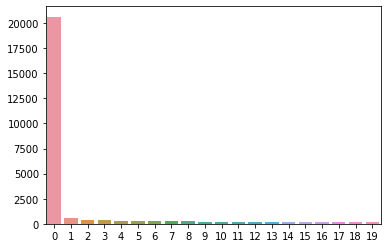

In [ ]:
import seaborn as sns
sns.barplot(x=list(range(len(D))), y = D)

In [ ]:

term_topic_matrix=pd.DataFrame(data=V_T, index = vectorizer.get_feature_names(), columns = [f'Topic_{r}' for r in range(0,V_T.shape[1])])
term_topic_matrix

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19
aa,4.658867e-05,1.846128e-03,-7.386077e-04,-3.268511e-03,-1.300777e-03,1.406507e-03,3.218397e-03,0.007258,0.024576,-0.007285,5.665568e-03,-1.827233e-03,-0.002910,-8.039103e-03,0.005274,-0.002543,0.004557,0.006865,-0.006952,-0.003242
aal,1.030650e-05,6.081097e-07,-6.612237e-07,-3.907385e-07,2.451641e-06,9.367371e-07,-1.587971e-06,0.000004,0.000002,-0.000003,-2.299030e-06,-1.585865e-06,0.000001,-6.544781e-06,-0.000007,0.000012,0.000009,0.000077,-0.000011,-0.000058
aba,2.388289e-09,1.676981e-06,-1.346352e-06,-2.122526e-06,4.324729e-06,1.199013e-06,-6.740501e-07,0.000004,0.000005,-0.000007,-8.296258e-07,3.541608e-06,0.000003,-5.575887e-06,-0.000009,0.000019,0.000004,0.000053,0.000011,-0.000037
abacus,9.738309e-13,9.008773e-06,2.909452e-06,-1.247467e-05,4.697608e-06,1.096002e-05,-7.764227e-06,-0.000003,0.000017,-0.000022,4.659690e-08,8.023637e-06,0.000005,-2.029953e-05,0.000018,0.000025,0.000007,0.000085,-0.000008,-0.000002
abandon,3.027432e-11,4.398072e-04,-4.261451e-04,6.613685e-05,-1.354312e-04,-9.787995e-05,2.227206e-04,-0.000181,-0.000177,-0.000492,-1.111305e-04,-1.918964e-04,-0.000243,3.617214e-04,-0.000342,0.001123,0.000269,-0.000360,-0.000210,-0.000149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoology,3.662939e-11,4.268208e-04,-4.644867e-04,-1.171765e-04,-1.277805e-06,3.602186e-04,4.007421e-04,0.000252,0.000435,0.000006,-9.522081e-04,5.985139e-04,-0.000874,-6.806132e-06,-0.000744,0.002334,-0.000876,0.000583,-0.000719,0.000295
zoom,3.526659e-08,2.004695e-03,1.105736e-03,-4.300312e-03,-3.506735e-03,-3.706321e-03,-1.115925e-03,0.002346,-0.002434,0.000442,-1.104247e-03,6.836987e-04,0.001850,1.869442e-05,0.002152,-0.000721,0.002822,0.001626,-0.004284,0.002402
zorro,3.091035e-12,1.859290e-05,-1.548240e-05,-2.478531e-05,-1.140070e-05,-1.982012e-07,2.419526e-05,0.000040,0.000131,-0.000038,7.107914e-06,1.309096e-05,0.000013,-1.043444e-05,-0.000017,0.000076,-0.000041,0.000103,0.000084,0.000028
zowie,1.018734e-12,6.799306e-06,-8.003468e-06,-2.169581e-06,3.717382e-06,7.138675e-06,3.399426e-06,0.000005,0.000001,-0.000005,-1.368649e-05,1.129695e-05,-0.000012,-2.597514e-07,-0.000008,0.000057,-0.000012,0.000029,0.000003,0.000018


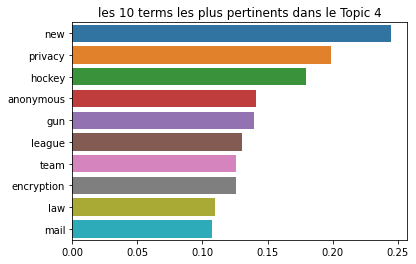

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

data = term_topic_matrix[f'Topic_4']
data = data.sort_values(ascending=False)
top_10 = data[:10]
title='les 10 terms les plus pertinents dans le Topic 4'
plt.title(title)
sns.barplot(x= top_10.values, y=top_10.index)


## 2.2 LDA
### 2.2.1 Vectorisation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#Bag of words 
vectorizer = CountVectorizer(stop_words = 'english')
vect = vectorizer.fit_transform(corpus_lemetized) 


### 2.2.2 Modèle  LDA

In [ ]:
alpha=1/20 # valeur par defaut 
eta=1/20 # valeur par defaut 
lda = LatentDirichletAllocation(n_components=20,doc_topic_prior=alpha,topic_word_prior=eta)
theta=lda.fit_transform(vect) #  distribution topics/document
beta=lda.components_  #  distribution mots/topics

### 2.2.3 Evaluation  

In [ ]:
# Log Likelyhood: Higher the better
print("Likelihood: ", lda.score(vect))
# Perplexity: Lower the better.
print("Perplexité: ", lda.perplexity(vect))
# visualisation des parametres du modèle 
print(lda.get_params())

Likelihood:  -7587436.405425634
Perplexité:  1671.573846279621
{'batch_size': 128, 'doc_topic_prior': 0.05, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 20, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': None, 'topic_word_prior': 0.05, 'total_samples': 1000000.0, 'verbose': 0}


### 2.2.2 Visualisation  

In [ ]:
#Visualisation de la matrice theta des documents X topics

doc_topic_matrix=pd.DataFrame(data=theta, index = [f'Doc_{r}' for r in range(0,theta.shape[0])], columns = [f'Topic_{r}' for r in range(0,beta.T.shape[1])])
doc_topic_matrix


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19
Doc_0,0.001250,0.001250,0.001250,0.001250,0.001250,0.001250,0.001250,0.001250,0.001250,0.529903,0.001250,0.001250,0.001250,0.120101,0.001250,0.001250,0.328745,0.001250,0.001250,0.001250
Doc_1,0.702389,0.036617,0.000962,0.000962,0.000962,0.000962,0.000962,0.000962,0.000962,0.120628,0.000962,0.000962,0.000962,0.124981,0.000962,0.000962,0.000962,0.000962,0.000962,0.000962
Doc_2,0.326811,0.000490,0.000490,0.000490,0.000490,0.000490,0.000490,0.235762,0.000490,0.000490,0.000490,0.000490,0.000490,0.000490,0.000490,0.048941,0.380643,0.000490,0.000490,0.000490
Doc_3,0.347755,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.630816,0.001190,0.001190,0.001190
Doc_4,0.139343,0.000909,0.000909,0.000909,0.138335,0.000909,0.000909,0.000909,0.000909,0.000909,0.150001,0.000909,0.000909,0.000909,0.000909,0.000909,0.557776,0.000909,0.000909,0.000909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc_11309,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.294365,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.697302
Doc_11310,0.902150,0.001250,0.001250,0.001250,0.001250,0.001250,0.001250,0.001250,0.001250,0.001250,0.001250,0.075350,0.001250,0.001250,0.001250,0.001250,0.001250,0.001250,0.001250,0.001250
Doc_11311,0.350861,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.546392,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.001190,0.082508,0.001190
Doc_11312,0.000820,0.694856,0.000820,0.000820,0.000820,0.000820,0.000820,0.000820,0.000820,0.000820,0.105302,0.000820,0.000820,0.000820,0.000820,0.000820,0.185907,0.000820,0.000820,0.000820


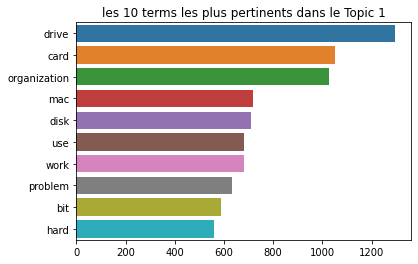

In [ ]:
#affichage de la matrice beta des termes x Topics

term_topic_matrix=pd.DataFrame(data=beta.T, index = vectorizer.get_feature_names(), columns = [f'Topic_{r}' for r in range(0,beta.T.shape[1])])
term_topic_matrix


from matplotlib import pyplot as plt
import seaborn as sns

data = term_topic_matrix[f'Topic_0']
data = data.sort_values(ascending=False)
top_10 = data[:10]
title='les 10 terms les plus pertinents dans le Topic 1'
plt.title(title)
sns.barplot(x= top_10.values, y=top_10.index)




 # Exercice
    *Realiser un visualisation globale des differentes topics decouverts pour la LSA et la LDA
    *Appliquer le modele unigrame language model pour decouvrir un topic par document

# LDA

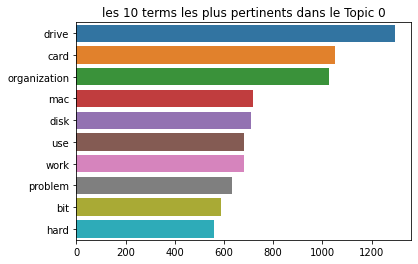

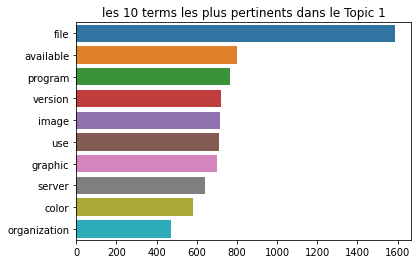

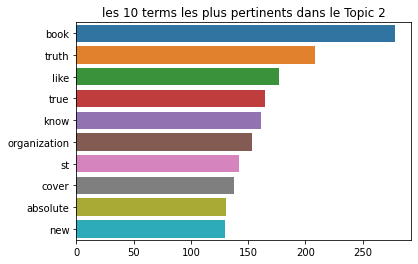

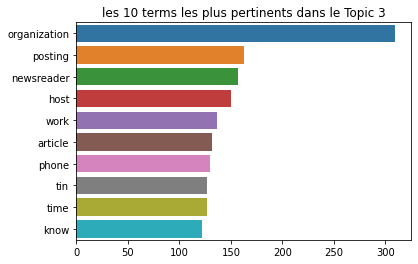

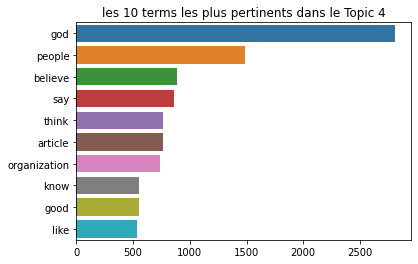

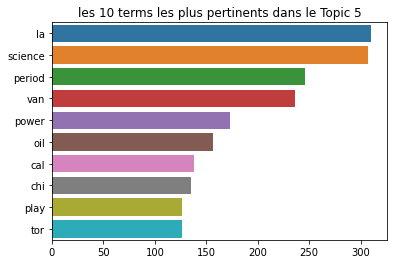

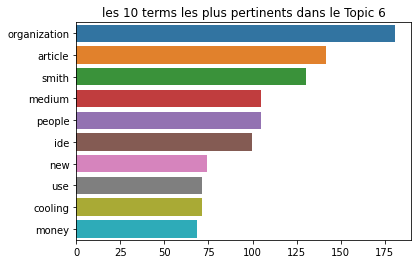

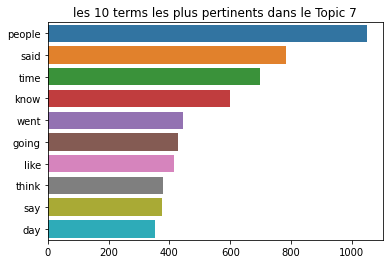

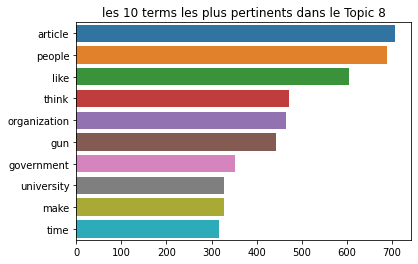

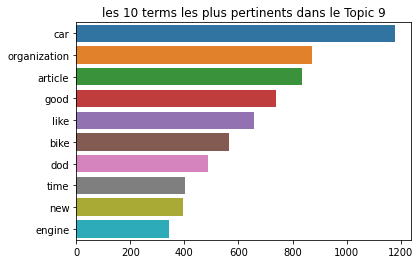

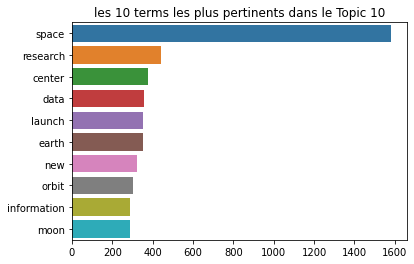

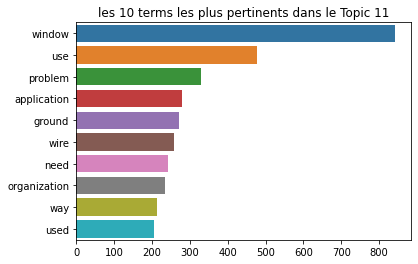

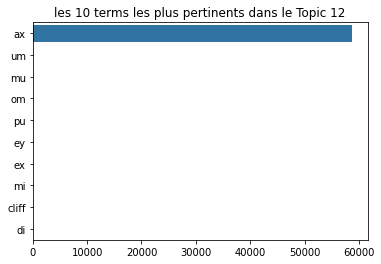

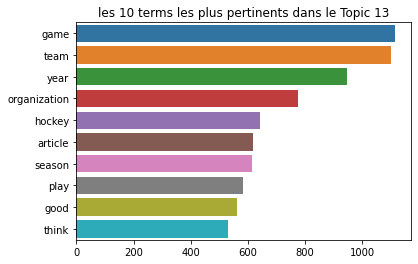

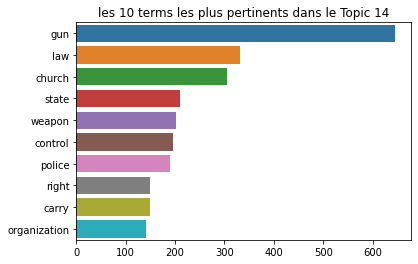

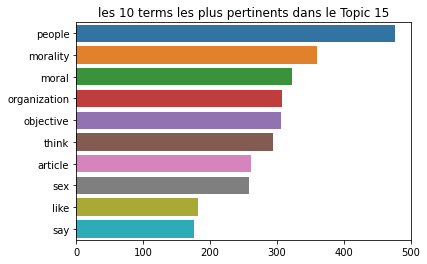

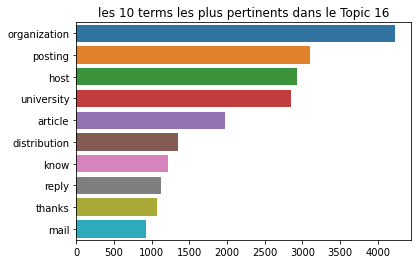

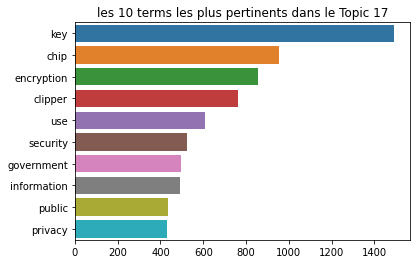

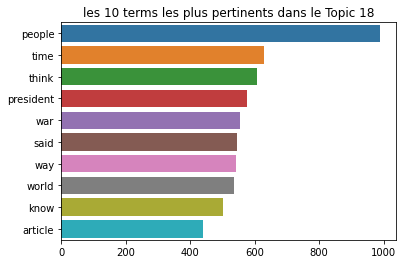

In [ ]:
import matplotlib.pyplot as plt

for i in range (19):
    plt.figure(i)
    data = term_topic_matrix[f'Topic_'+str(i)]
    data = data.sort_values(ascending=False)
    top_10 = data[:10]
    title='les 10 terms les plus pertinents dans le Topic '+str(i)
    plt.title(title)
    sns.barplot(x= top_10.values, y=top_10.index)




# LSA

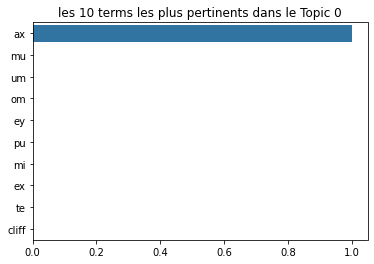

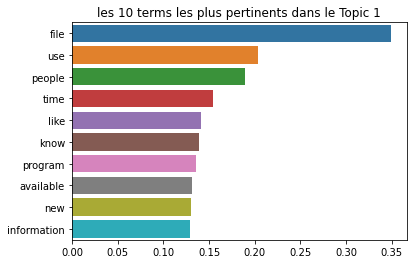

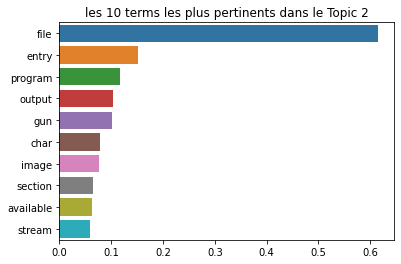

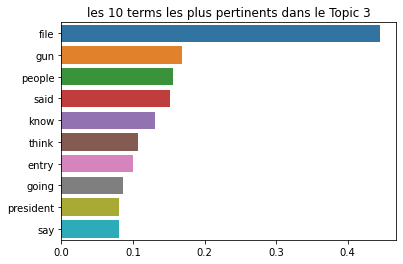

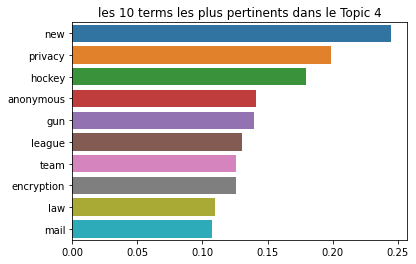

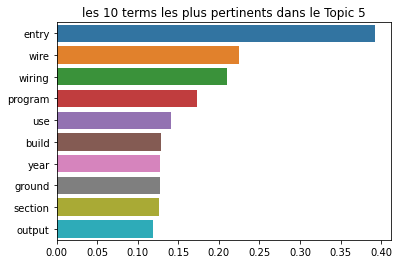

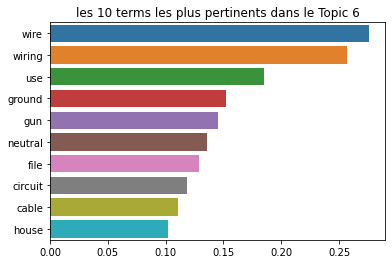

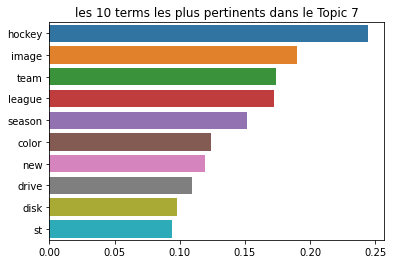

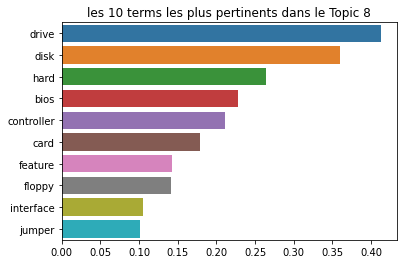

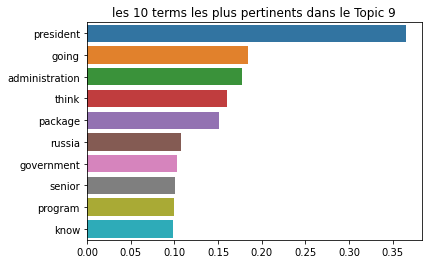

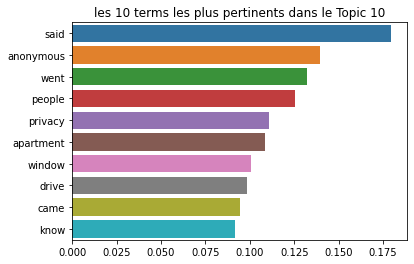

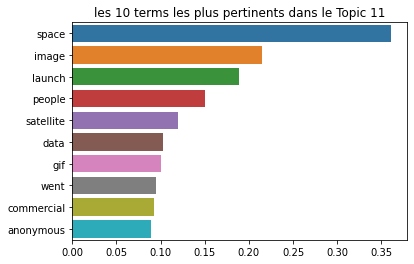

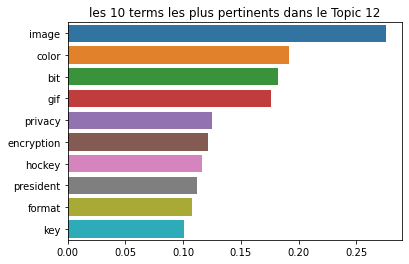

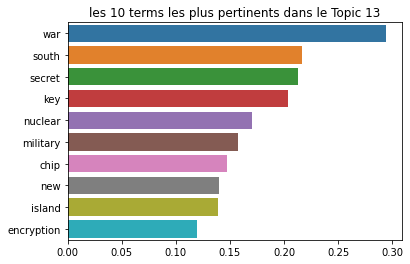

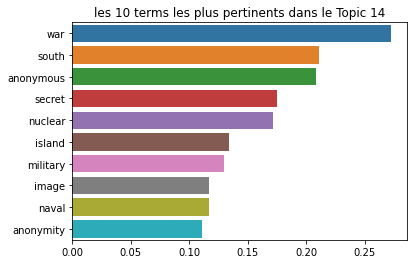

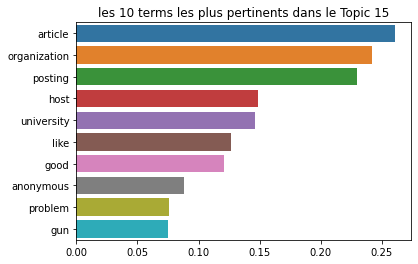

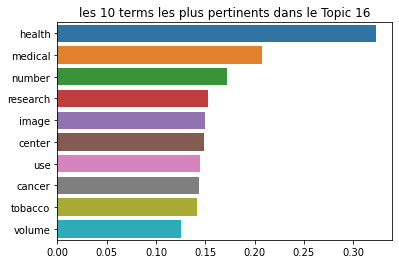

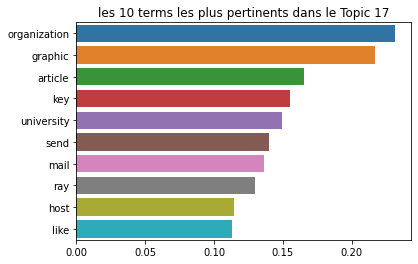

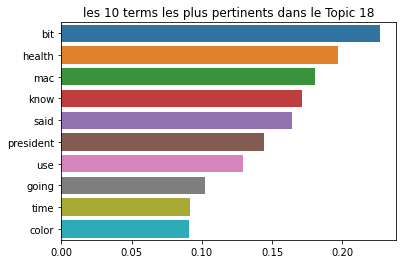

In [ ]:
import matplotlib.pyplot as plt

for i in range (19):
    plt.figure(i)
    data = term_topic_matrix[f'Topic_'+str(i)]
    data = data.sort_values(ascending=False)
    top_10 = data[:10]
    title='les 10 terms les plus pertinents dans le Topic '+str(i)
    plt.title(title)
    sns.barplot(x= top_10.values, y=top_10.index)




In [ ]:
len(Corp)

11314

# Unigram

In [ ]:
Vocab=set()
for c in Corp:
    for e in c:
      Vocab.add(e)

In [ ]:
len(Vocab)

21220

In [ ]:
def modeluni(d):
  T=d.split(" ") 
  tab=[]
  for t in T :
    if len(t)>1:
      c=d.count(t)
      s=0
    else:
      c=0
    for k in Vocab:
      s+=d.count(k)
    tab.append(c/s)
  return T[tab.index(max(tab))]
  


In [ ]:
corpus_lemetized[0]

'thing car posting host organization university college park wondering anyone could enlighten car saw day door sport car late early really small addition front bumper separate rest body know anyone model name engine spec production car made history whatever funky looking car please e mail thanks brought neighborhood'

In [ ]:
modeluni(corpus_lemetized[0])

'car'